In [2]:
!pip install foolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2638 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1145 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0781 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0578 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0459 - accuracy: 0.9854


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


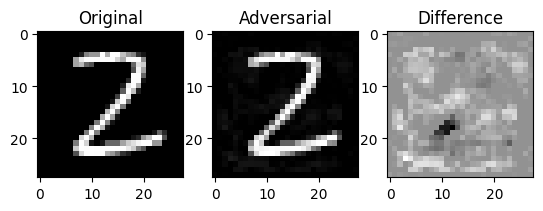

In [3]:
import numpy as np
import tensorflow as tf
import foolbox
import eagerpy as ep
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

fmodel = foolbox.models.TensorFlowModel(model, bounds=(0, 1))

idx = np.random.randint(0, len(test_images))
image, label = test_images[idx].astype(np.float32), test_labels[idx]

label = np.array([label], dtype=np.int64)

image_tensor = tf.convert_to_tensor(image.reshape((1, 28, 28, 1)))

attack = foolbox.attacks.L2DeepFoolAttack()

epsilons = [0.01]  # Пример значения, может потребоваться настройка
adversarial = attack(fmodel, image_tensor, label, epsilons=epsilons)

plt.figure()

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image.squeeze(), cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Adversarial")
plt.imshow(adversarial[0][0].numpy().squeeze(), cmap="gray")


plt.subplot(1, 3, 3)
plt.title("Difference")
plt.imshow(adversarial[0][0].numpy().squeeze() - image.squeeze(), cmap="gray")

plt.show()